第3章: 正規表現

In [1]:
!wget https://nlp100.github.io/data/jawiki-country.json.gz

--2023-04-03 14:48:36--  https://nlp100.github.io/data/jawiki-country.json.gz
nlp100.github.io (nlp100.github.io) をDNSに問いあわせています... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
nlp100.github.io (nlp100.github.io)|185.199.108.153|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 5068362 (4.8M) [application/gzip]
`jawiki-country.json.gz' に保存中

jawiki-country.json 100%[===================>]   4.83M  23.0MB/s 時間 0.2s       

2023-04-03 14:48:38 (23.0 MB/s) - `jawiki-country.json.gz' へ保存完了 [5068362/5068362]



In [3]:
!wc -l data/jawiki-country.json.gz

   20456 data/jawiki-country.json.gz


#20. JSONデータの読み込み

Wikipedia記事のJSONファイルを読み込み，「イギリス」に関する記事本文を表示せよ．問題21-29では，ここで抽出した記事本文に対して実行せよ

In [18]:
#gzipの解凍
#jsone形式のファイルをパース

import gzip
import json

filename = 'data/jawiki-country.json.gz'

with gzip.open(filename) as fi, open('work/uk.txt', 'w') as fo:
    for data in fi:
        data = json.loads(data)
        if data['title'] == 'イギリス':
            uk_txt = data['text']
            fo.write(uk_txt)
            break

#print(uk_txt)
#type(uk_txt) -> str


In [9]:
!head 'work/uk.txt'

{{redirect|UK}}
{{redirect|英国|春秋時代の諸侯国|英 (春秋)}}
{{Otheruses|ヨーロッパの国|長崎県・熊本県の郷土料理|いぎりす}}
{{基礎情報 国
|略名  =イギリス
|日本語国名 = グレートブリテン及び北アイルランド連合王国
|公式国名 = {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）
*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）
*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）


In [10]:
!tail 'work/uk.txt'

{{デフォルトソート:いきりす}}
[[Category:イギリス|*]]
[[Category:イギリス連邦加盟国]]
[[Category:英連邦王国|*]]
[[Category:G8加盟国]]
[[Category:欧州連合加盟国|元]]
[[Category:海洋国家]]
[[Category:現存する君主国]]
[[Category:島国]]
[[Category:1801年に成立した国家・領域]]

#21. カテゴリ名を含む行を抽出

記事中でカテゴリ名を宣言している行を抽出せよ．

In [3]:
#wiki早見表より
#[[Category:ヘルプ|はやみひよう]]
#'['は特殊文字
import re
pt =re.compile(r'\[\[Category:.*?\]\]$')
 
with open('work/uk.txt') as f:
    for line in f:
        if pt.search(line):
            print(line.rstrip())

[[Category:イギリス|*]]
[[Category:イギリス連邦加盟国]]
[[Category:英連邦王国|*]]
[[Category:G8加盟国]]
[[Category:欧州連合加盟国|元]]
[[Category:海洋国家]]
[[Category:現存する君主国]]
[[Category:島国]]
[[Category:1801年に成立した国家・領域]]


#22. カテゴリ名の抽出

記事のカテゴリ名を（行単位ではなく名前で）抽出せよ．

In [45]:
pt =re.compile(r'\[\[Category:(.*?)[]|]+')
 
with open('work/uk.txt') as f:
    for line in f:
        line = pt.search(line.rstrip())
        if line:
            print(line.group(1))

イギリス
イギリス連邦加盟国
英連邦王国
G8加盟国
欧州連合加盟国
海洋国家
現存する君主国
島国
1801年に成立した国家・領域


#23. セクション構造

記事中に含まれるセクション名とそのレベル（例えば”== セクション名 ==”なら1）を表示せよ．

In [35]:
pt = re.compile(r'(==+)(.*?)(==+)')

with open('work/uk.txt') as f:
    for line in f:
        line = pt.search(line.rstrip())
        if line:
            level = len(line.group(1)) - 1
            print(f'セクション名:{line.group(2)}\tレベル：{level}')

セクション名:国名	レベル：1
セクション名:歴史	レベル：1
セクション名:地理	レベル：1
セクション名:主要都市	レベル：2
セクション名:気候	レベル：2
セクション名:政治	レベル：1
セクション名:元首	レベル：2
セクション名:法	レベル：2
セクション名:内政	レベル：2
セクション名:地方行政区分	レベル：2
セクション名:外交・軍事	レベル：2
セクション名:経済	レベル：1
セクション名:鉱業	レベル：2
セクション名:農業	レベル：2
セクション名:貿易	レベル：2
セクション名:不動産	レベル：2
セクション名:エネルギー政策	レベル：2
セクション名:通貨	レベル：2
セクション名:企業	レベル：2
セクション名:通信	レベル：3
セクション名:交通	レベル：1
セクション名:道路	レベル：2
セクション名:鉄道	レベル：2
セクション名:海運	レベル：2
セクション名:航空	レベル：2
セクション名:科学技術	レベル：1
セクション名:国民	レベル：1
セクション名:言語	レベル：2
セクション名:宗教	レベル：2
セクション名:婚姻	レベル：2
セクション名:移住	レベル：2
セクション名:教育	レベル：2
セクション名:医療	レベル：2
セクション名:文化	レベル：1
セクション名:食文化	レベル：2
セクション名:文学	レベル：2
セクション名:哲学	レベル：2
セクション名:音楽	レベル：2
セクション名:ポピュラー音楽	レベル：3
セクション名:映画	レベル：2
セクション名:コメディ	レベル：2
セクション名:国花	レベル：2
セクション名:世界遺産	レベル：2
セクション名:祝祭日	レベル：2
セクション名:スポーツ	レベル：2
セクション名:サッカー	レベル：3
セクション名:クリケット	レベル：3
セクション名:競馬	レベル：3
セクション名:モータースポーツ	レベル：3
セクション名:野球	レベル：3
セクション名: カーリング 	レベル：3
セクション名: 自転車競技 	レベル：3
セクション名:脚注	レベル：1
セクション名:関連項目	レベル：1
セクション名:外部リンク	レベル：1


#24. ファイル参照の抽出

記事から参照されているメディアファイルをすべて抜き出せ

In [71]:
pt1 = re.compile(r'ファイル:(.*?)[\|\]]')

with open('work/uk.txt') as f:
    for line in f:
        for found_line in pt1.finditer(line.rstrip()):
            print(found_line.group(1))

Royal Coat of Arms of the United Kingdom.svg
United States Navy Band - God Save the Queen.ogg
Descriptio Prime Tabulae Europae.jpg
Lenepveu, Jeanne d'Arc au siège d'Orléans.jpg
London.bankofengland.arp.jpg
Battle of Waterloo 1815.PNG
Uk topo en.jpg
BenNevis2005.jpg
Population density UK 2011 census.png
2019 Greenwich Peninsula & Canary Wharf.jpg
Birmingham Skyline from Edgbaston Cricket Ground crop.jpg
Leeds CBD at night.jpg
Glasgow and the Clyde from the air (geograph 4665720).jpg
Palace of Westminster, London - Feb 2007.jpg
Scotland Parliament Holyrood.jpg
Donald Trump and Theresa May (33998675310) (cropped).jpg
Soldiers Trooping the Colour, 16th June 2007.jpg
City of London skyline from London City Hall - Oct 2008.jpg
Oil platform in the North SeaPros.jpg
Eurostar at St Pancras Jan 2008.jpg
Heathrow Terminal 5C Iwelumo-1.jpg
Airbus A380-841 G-XLEB British Airways (10424102995).jpg
UKpop.svg
Anglospeak.svg
Royal Aberdeen Children's Hospital.jpg
CHANDOS3.jpg
The Fabs.JPG
Wembley Stadi

In [73]:
#形式はjpg, svgなど
#「hogehoge.~」形式のファイルを狙い撃ち
pt = re.compile(r'\[\[ファイル:(.*?\.\w{3})[\|\]]')

media_file_list = pt.findall(uk_txt)
for found_line in media_file_list:
    print(found_line)
print(len(media_file_list))

Royal Coat of Arms of the United Kingdom.svg
United States Navy Band - God Save the Queen.ogg
Descriptio Prime Tabulae Europae.jpg
Lenepveu, Jeanne d'Arc au siège d'Orléans.jpg
London.bankofengland.arp.jpg
Battle of Waterloo 1815.PNG
Uk topo en.jpg
BenNevis2005.jpg
Population density UK 2011 census.png
2019 Greenwich Peninsula & Canary Wharf.jpg
Birmingham Skyline from Edgbaston Cricket Ground crop.jpg
Leeds CBD at night.jpg
Glasgow and the Clyde from the air (geograph 4665720).jpg
Palace of Westminster, London - Feb 2007.jpg
Scotland Parliament Holyrood.jpg
Donald Trump and Theresa May (33998675310) (cropped).jpg
Soldiers Trooping the Colour, 16th June 2007.jpg
City of London skyline from London City Hall - Oct 2008.jpg
Oil platform in the North SeaPros.jpg
Eurostar at St Pancras Jan 2008.jpg
Heathrow Terminal 5C Iwelumo-1.jpg
Airbus A380-841 G-XLEB British Airways (10424102995).jpg
UKpop.svg
Anglospeak.svg
Royal Aberdeen Children's Hospital.jpg
CHANDOS3.jpg
The Fabs.JPG
Wembley Stadi

#25. テンプレートの抽出

記事中に含まれる「基礎情報」テンプレートのフィールド名と値を抽出し，辞書オブジェクトとして格納せよ．

In [110]:
#基礎情報部分の抜き出し
data = []
ans = False
with open('work/uk.txt') as f:
    for line in f:
        if ans:
            if line.startswith('}}'):
                break
            else:
                data.append(line.rstrip())
        else:
            if line.startswith('{{基礎情報'):
                ans = True
#data      

In [111]:
basic_info_dict = {}
temp = re.compile(r'\|(.*?)=\s*(.*)')
for info in data:
    match_info = temp.match(info)
    if match_info:
        key = match_info.group(1)
        value = match_info.group(2)
        basic_info_dict[key] = value
basic_info_dict

{'略名  ': 'イギリス',
 '日本語国名 ': 'グレートブリテン及び北アイルランド連合王国',
 '公式国名 ': '{{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />',
 '国旗画像 ': 'Flag of the United Kingdom.svg',
 '国章画像 ': '[[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]',
 '国章リンク ': '（[[イギリスの国章|国章]]）',
 '標語 ': '{{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Dieu et mon droit|神と我が権利]]）',
 '国歌 ': "[[女王陛下万歳|{{lang|en|God Save the Queen}}]]{{en icon}}<br />''神よ女王を護り賜え''<br />{{center|[[ファイル:United States Navy Band - God Save the Queen.ogg]]}}",
 '地図画像 ': 'Europe-UK.svg',
 '位置画像 ': 'United Kingdom (+overseas territories) in the World (+Antarctica claims).svg',
 '公用語 ': '[[英語]]',
 '首都 ': '[[ロンドン]]（事実上）',
 '最大都市 ': 'ロンドン',
 '元首等肩書 ': '[[イギリスの君主|女王]]',
 '元首等氏名 ': '[[エリザベス2世]]',
 '首相等肩書 ': '[[イギリスの首相|首相]]',
 '首相等氏名 ': '[[ボリス・ジョンソン]]',
 '他元首等肩書1 ': '[[貴族院 (イギリス)|貴族院議長]]',
 '他元首等氏名1 ': '[[:en:Norman Fowler, Baron Fowler|ノーマン・ファウラー]]',
 '他元首等肩書2 ': '[[庶民院 (イギリス)|庶民院議長]]',
 '他元首等氏名2 ': '{{

#26. 強調マークアップの除去

25の処理時に，テンプレートの値からMediaWikiの強調マークアップ（弱い強調，強調，強い強調のすべて）を除去してテキストに変換せよ（参考: マークアップ早見表）．

In [112]:
pt1 = re.compile(r'\'{2,5}')
for k,v in basic_info_dict.items():
    v = pt1.sub('',v)
    print(f'{k}:{v}')

略名  :イギリス
日本語国名 :グレートブリテン及び北アイルランド連合王国
公式国名 :{{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
国旗画像 :Flag of the United Kingdom.svg
国章画像 :[[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]
国章リンク :（[[イギリスの国章|国章]]）
標語 :{{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Dieu et mon droit|神と我が権利]]）
国歌 :[[女王陛下万歳|{{lang|en|God Save the Queen}}]]{{en icon}}<br />神よ女王を護り賜え<br />{{center|[[ファイル:United States Navy Band - God Save the Queen.ogg]]}}
地図画像 :Europe-UK.svg
位置画像 :United Kingdom (+overseas territories) in the World (+Antarctica claims).svg
公用語 :[[英語]]
首都 :[[ロンドン]]（事実上）
最大都市 :ロンドン
元首等肩書 :[[イギリスの君主|女王]]
元首等氏名 :[[エリザベス2世]]
首相等肩書 :[[イギリスの首相|首相]]
首相等氏名 :[[ボリス・ジョンソン]]
他元首等肩書1 :[[貴族院 (イギリス)|貴族院議長]]
他元首等氏名1 :[[:en:Norman Fowler, Baron Fowler|ノーマン・ファウラー]]
他元首等肩書2 :[[庶民院 (イギリス)|庶民院議長]]
他元首等氏名2 :{{仮リンク|リンゼイ・ホイル|en|Lindsay Hoyle}}
他元首等肩書3 :[[連合王国最高裁判所|最高裁判所長官]]
他元首等氏名3 :[[:en:Brenda Hale, Baroness Hale of Richmond|ブレンダ・ヘイル]]
面積順位 :76
面積大きさ :1 E1

#27. 内部リンクの除去

26の処理に加えて，テンプレートの値からMediaWikiの内部リンクマークアップを除去し，テキストに変換せよ（参考: マークアップ早見表）．

In [113]:
pt1 = re.compile(r'\'{2,5}')
#①[[記事名]] → 記事名　
pt2 = re.compile(r'\[\[([^\|]+?)\]\]')
#②[[記事名|表示文字 ]] → 表示文字　｜　[[記事名#節名|表示文字]] → 表示文字
pt3 = re.compile(r'\[\[(?:[^\|]*)\|(.*?)\]\]')

for k,v in basic_info_dict.items():
    v = pt1.sub('',v)
    v = pt2.sub(r'\1',v)
    v = pt3.sub(r'\1',v)
    print(f'{k}:{v}')

略名  :イギリス
日本語国名 :グレートブリテン及び北アイルランド連合王国
公式国名 :{{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
国旗画像 :Flag of the United Kingdom.svg
国章画像 :85px|イギリスの国章
国章リンク :（国章）
標語 :{{lang|fr|Dieu et mon droit}}<br />（フランス語:神と我が権利）
国歌 :{{lang|en|God Save the Queen}}{{en icon}}<br />神よ女王を護り賜え<br />{{center|ファイル:United States Navy Band - God Save the Queen.ogg}}
地図画像 :Europe-UK.svg
位置画像 :United Kingdom (+overseas territories) in the World (+Antarctica claims).svg
公用語 :英語
首都 :ロンドン（事実上）
最大都市 :ロンドン
元首等肩書 :女王
元首等氏名 :エリザベス2世
首相等肩書 :首相
首相等氏名 :ボリス・ジョンソン
他元首等肩書1 :貴族院議長
他元首等氏名1 :ノーマン・ファウラー
他元首等肩書2 :庶民院議長
他元首等氏名2 :{{仮リンク|リンゼイ・ホイル|en|Lindsay Hoyle}}
他元首等肩書3 :最高裁判所長官
他元首等氏名3 :ブレンダ・ヘイル
面積順位 :76
面積大きさ :1 E11
面積値 :244,820
水面積率 :1.3%
人口統計年 :2018
人口順位 :22
人口大きさ :1 E7
人口値 :6643万5600<ref>{{Cite web|url=https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates|title=Population estimates - Office for National Statistics|accessdate=2019-06-26|date=201

#28. MediaWikiマークアップの除去

27の処理に加えて，テンプレートの値からMediaWikiマークアップを可能な限り除去し，国の基本情報を整形せよ．

In [118]:
#basic_info_dict

In [115]:
pt4 = re.compile(r'\[\[ファイル:([^\|]+?)\|.+?\]\]')
pt5 = re.compile(r'<(ref|br).*?/>')
pt6 = re.compile(r'\{\{(.+?)\}\}')
pt7 = re.compile(r'\[\[ファイル:([^\|]+?)\-(.+?)\]\]')
pt8 = re.compile(r'<ref.+?</ref>')

In [117]:
for k,v in basic_info_dict.items():
    v = pt1.sub('',v)
    v = pt2.sub(r'\1',v)
    v = pt3.sub(r'\1',v)
    v = pt4.sub(r'\1',v)
    v = pt5.sub('',v)
    v = pt6.sub(r'\1',v)
    v = pt7.sub(r'\1',v)
    v = pt8.sub('',v)
    print(f'{k}:{v}')

略名  :イギリス
日本語国名 :グレートブリテン及び北アイルランド連合王国
公式国名 :lang|en|United Kingdom of Great Britain and Northern Ireland
国旗画像 :Flag of the United Kingdom.svg
国章画像 :85px|イギリスの国章
国章リンク :（国章）
標語 :lang|fr|Dieu et mon droit（フランス語:神と我が権利）
国歌 :lang|en|God Save the Queenen icon神よ女王を護り賜えcenter|ファイル:United States Navy Band - God Save the Queen.ogg
地図画像 :Europe-UK.svg
位置画像 :United Kingdom (+overseas territories) in the World (+Antarctica claims).svg
公用語 :英語
首都 :ロンドン（事実上）
最大都市 :ロンドン
元首等肩書 :女王
元首等氏名 :エリザベス2世
首相等肩書 :首相
首相等氏名 :ボリス・ジョンソン
他元首等肩書1 :貴族院議長
他元首等氏名1 :ノーマン・ファウラー
他元首等肩書2 :庶民院議長
他元首等氏名2 :仮リンク|リンゼイ・ホイル|en|Lindsay Hoyle
他元首等肩書3 :最高裁判所長官
他元首等氏名3 :ブレンダ・ヘイル
面積順位 :76
面積大きさ :1 E11
面積値 :244,820
水面積率 :1.3%
人口統計年 :2018
人口順位 :22
人口大きさ :1 E7
人口値 :6643万5600
人口密度値 :271
GDP統計年元 :2012
GDP値元 :1兆5478億
GDP統計年MER :2012
GDP順位MER :6
GDP値MER :2兆4337億
GDP統計年 :2012
GDP順位 :6
GDP値 :2兆3162億
GDP/人 :36,727
建国形態 :建国
確立形態1 :イングランド王国／スコットランド王国（両国とも1707年合同法まで）
確立年月日1 :927年／843年
確立形態2 :グレートブリテン王国成立（1707年合同法）
確立年月日2 :1707年05月01日
確立形態3 :グレートブリテ

#29. 国旗画像のURLを取得する

テンプレートの内容を利用し，国旗画像のURLを取得せよ．（ヒント: MediaWiki APIのimageinfoを呼び出して，ファイル参照をURLに変換すればよい）

In [124]:
#Mediawikiサンプルコードより
import requests
S = requests.Session()#セッションの維持
URL = "https://en.wikipedia.org/w/api.php"
#パラメータ指定
PARAMS = {
    "action": "query",
    "format": "json",
    "prop": "imageinfo",
    "titles": "File:Flag of the United Kingdom.svg",
    "iiprop": "url"
}
R = S.get(url=URL, params=PARAMS)
DATA = R.json()
PAGES = DATA["query"]["pages"]#dictらしい...



for k, v in PAGES.items():
    print(v["imageinfo"][0]['url'])

https://upload.wikimedia.org/wikipedia/en/a/ae/Flag_of_the_United_Kingdom.svg


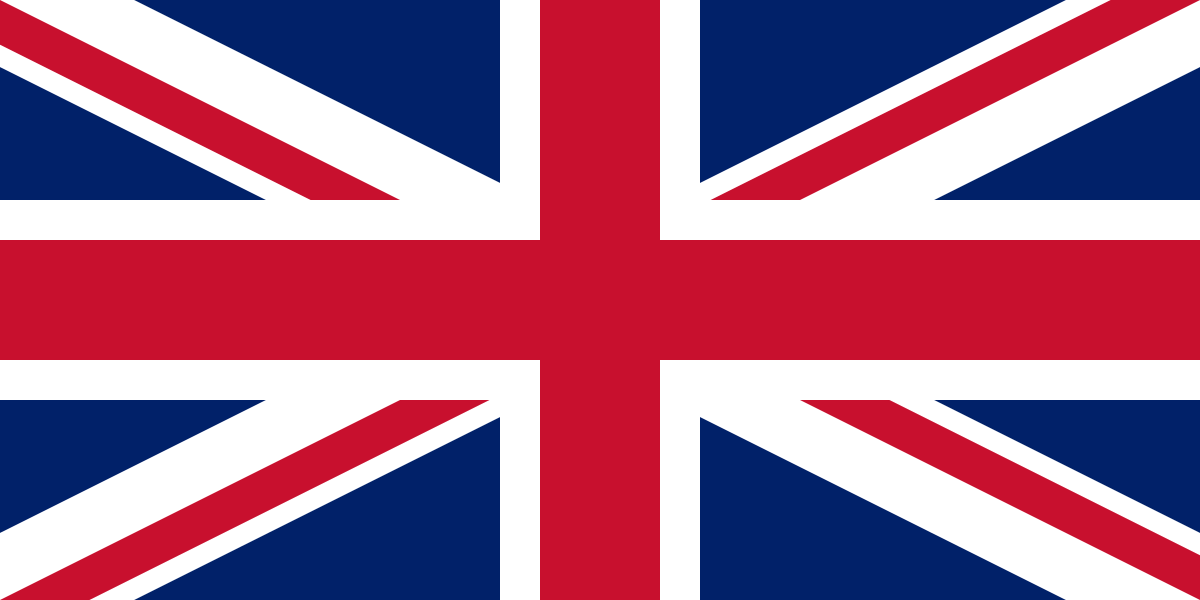

In [125]:
from IPython.display import SVG, display

display(SVG('https://upload.wikimedia.org/wikipedia/en/a/ae/Flag_of_the_United_Kingdom.svg'))

In [126]:
PAGES

{'23473560': {'pageid': 23473560,
  'ns': 6,
  'title': 'File:Flag of the United Kingdom.svg',
  'imagerepository': 'local',
  'imageinfo': [{'url': 'https://upload.wikimedia.org/wikipedia/en/a/ae/Flag_of_the_United_Kingdom.svg',
    'descriptionurl': 'https://en.wikipedia.org/wiki/File:Flag_of_the_United_Kingdom.svg',
    'descriptionshorturl': 'https://en.wikipedia.org/w/index.php?curid=23473560'}]}}